## Exercise 1 

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). 

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

In [2]:
# Using only ten percent of the data 
X = X[:7000,:]
y = y[:7000]

In [3]:
# Creating training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? 

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# Training a KNN model with K = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
y_pred = knn.predict(X_test)

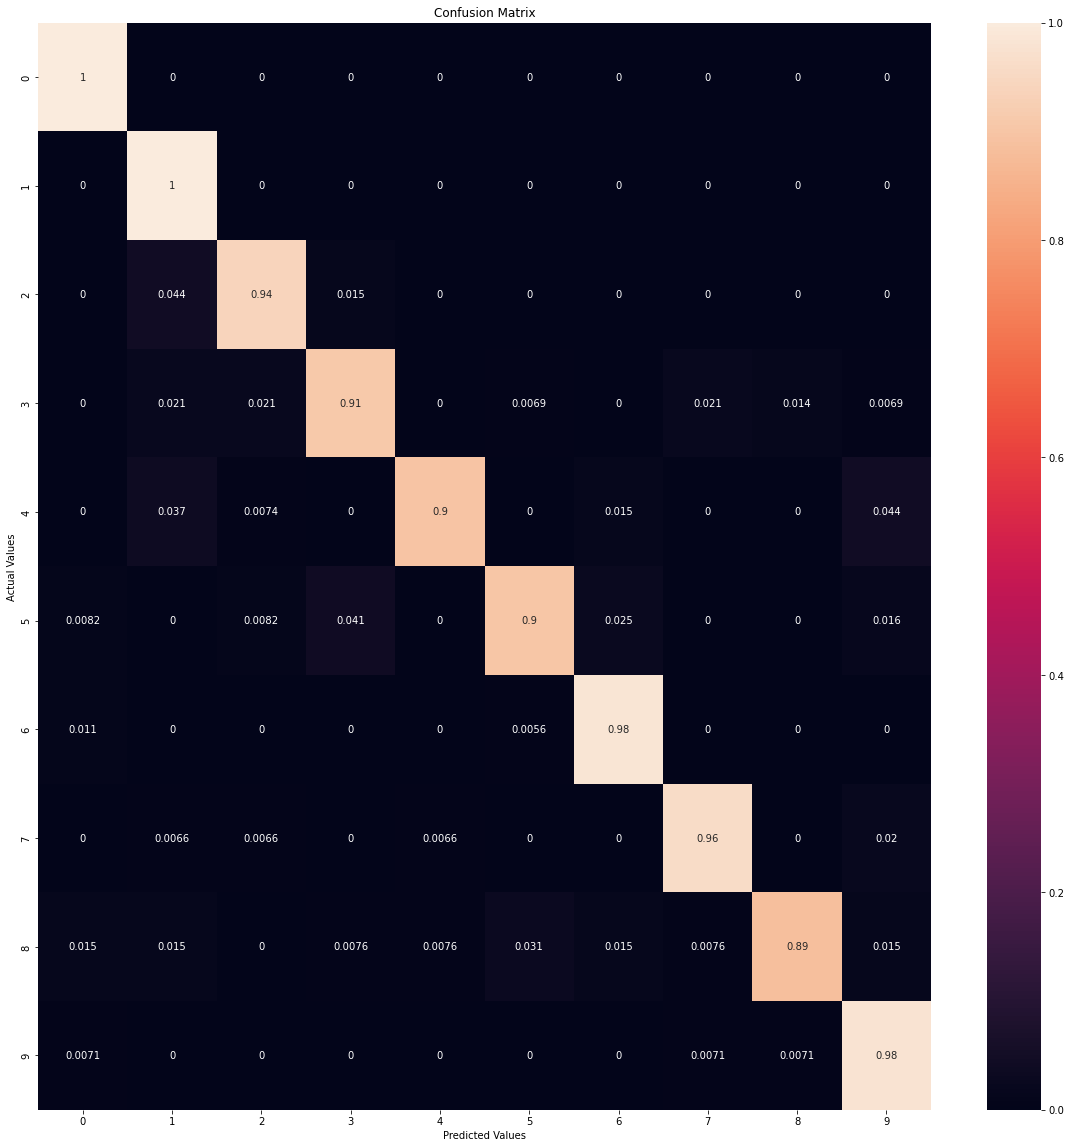

Accuracy =  0.9471428571428572


In [6]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize = 'true')
                     
#Plotting the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

print("Accuracy = ", knn.score(X_test, y_test))

The model has achieved an accuracy of nearly 95 %. The model finds class '8' to be the most confusing and often mistakes it for '5' or '6'. Following that, Classes '3', '4' and '5' were also often confused for each other.

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  

In [7]:
training_accuracy = []
testing_accuracy = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

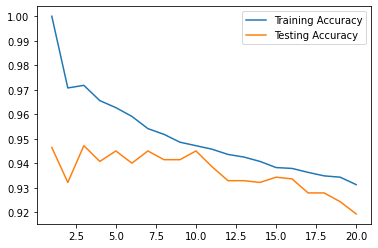

In [8]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), training_accuracy, label = "Training Accuracy")
plt.plot(range(1, 21), testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.show()

K = 3 is found to be most optimal because the model achieves maximum training and testing accuracy of about 97 % and 94.5 % respectively, at that value. K = 1 is not chosen since the training accuracy is at a 100 % at that value and the model could potentially be over fitting. 

d) Using the optimal model found in c), plot the confusion matrix and discuss. 

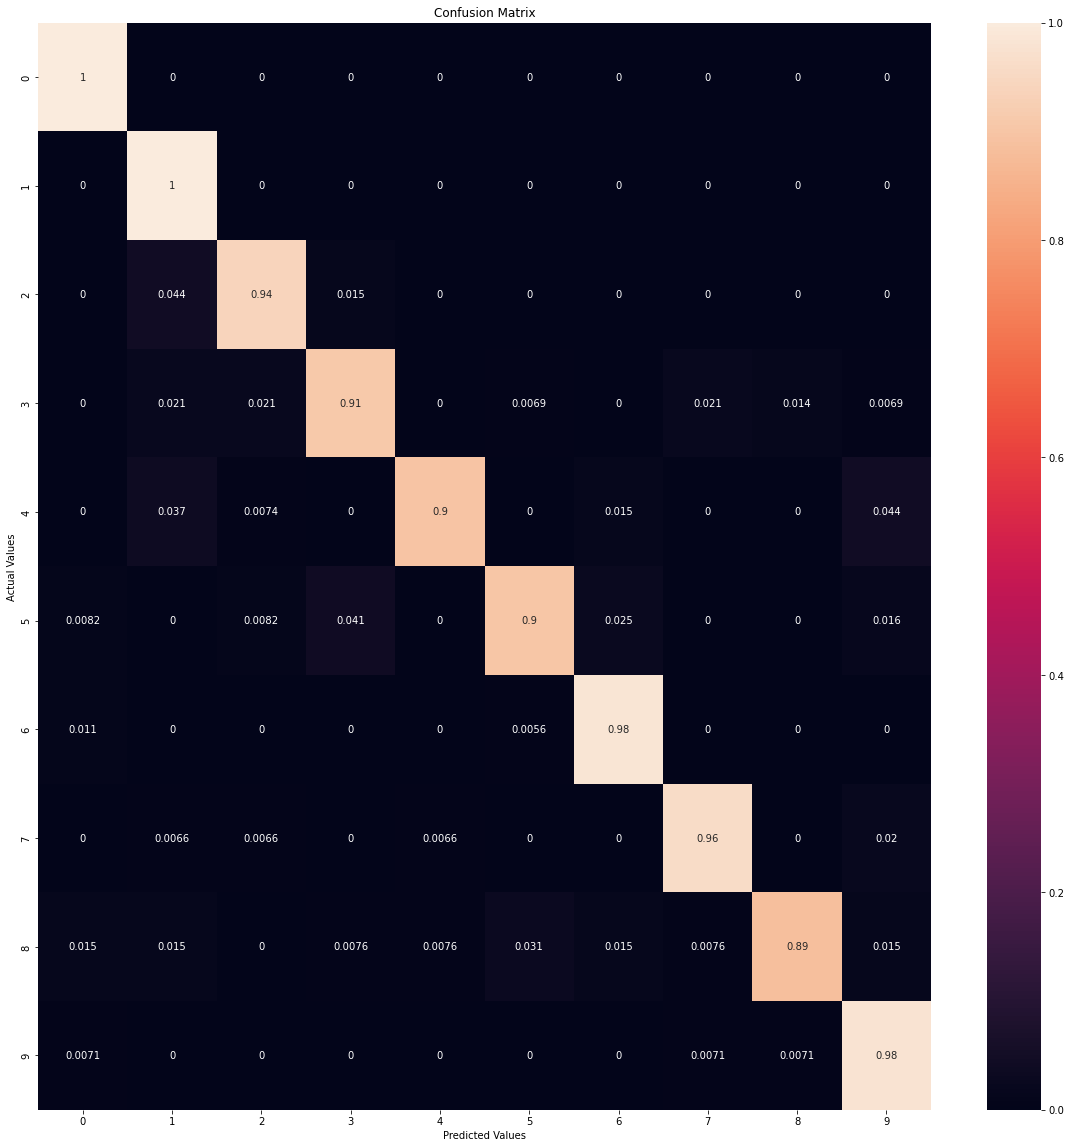

In [9]:
optimal_knn = KNeighborsClassifier(n_neighbors = 3)
optimal_knn.fit(X_train, y_train)
y_pred = optimal_knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred, normalize='true')
                     
#Plotting the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()


As discussed above, the model finds class '8' to be the most confusing and often mistakes it for '5' or '6' (Almost 11 % of the time). Following that, Classes '4' and '5' were also often confused for '1' and '3' respectively(Almost 10 % of the time). Class '3' is also mistaken for '1', '2', or '7' nearly 9 % of the time.

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). 

In [10]:
from sklearn.model_selection import cross_validate

training_accuracy = []
testing_accuracy = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_validate(knn, X, y, cv=10, return_train_score = True)
    training_accuracy.append(np.mean(scores['train_score']))
    testing_accuracy.append(np.mean(scores['test_score']))

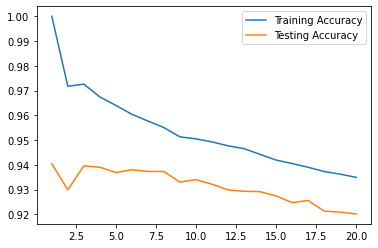

In [11]:
import matplotlib.pyplot as plt

plt.plot(range(1, 21), training_accuracy, label = "Training Accuracy")
plt.plot(range(1, 21), testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.show()

Here too, K = 3 is found to be most optimal where training and testing accuracy is found to be nearly 97.5 % and 94 % respectively. Again, K = 1 is not chosen since the training accuracy is at a 100 % at that value and the model could potentially be over fitting. Thus, the results obtained here are exactly in agreement to those obtained in c)

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. 

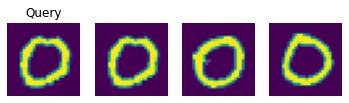

In [12]:
import random

def plot_k_neighbors(model, X, k):
    _, neighbors = model.kneighbors(X)
    plt.subplot(1,k+1,1)
    plt.title("Query")
    plt.axis("off")
    plt.imshow(X.reshape(28, 28))
    
    i = 2
    for n in neighbors[0]:
        plt.subplot(1,k+1,i)
        plt.axis("off")
        plt.imshow(X_train[n].reshape(28, 28))
        i += 1
    plt.show()

dataPoint  = X[random.randint(0, 6999)].reshape(1, -1)
plot_k_neighbors(optimal_knn, dataPoint, 3)

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. 

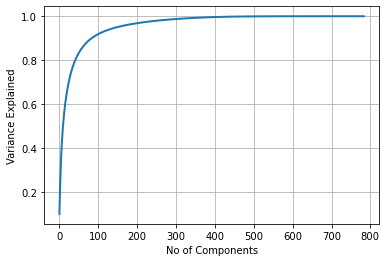

In [13]:
from sklearn.decomposition import PCA
pca = PCA()

pca.n_components = 784
pca_data = pca.fit_transform(X)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)

# Plotting the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis("tight")
plt.grid()
plt.xlabel("No of Components")
plt.ylabel("Variance Explained")
plt.show()

 To choose the number of dimensions, the cumulative sum of variance captured by the reduced dataset with dimensions from 1 to 784 is plotted on a graph . It can be seen that 300 dimensions explain almost 100% of the variance. So the dataset is reduced to 300 dimensions.

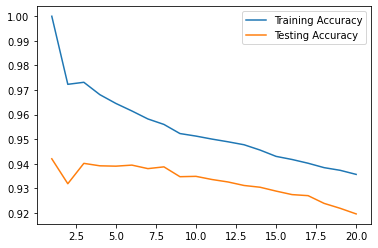

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

training_accuracy = []
testing_accuracy = []

for k in range(1, 21):
    dimensionality_reduction = PCA(n_components = 300)
    knn_model = KNeighborsClassifier(n_neighbors = k)
    model = make_pipeline(dimensionality_reduction, knn_model)
    scores = cross_validate(model, X, y, cv=10, return_train_score = True)
    training_accuracy.append(np.mean(scores['train_score']))
    testing_accuracy.append(np.mean(scores['test_score']))

plt.plot(range(1, 21), training_accuracy, label = "Training Accuracy")
plt.plot(range(1, 21), testing_accuracy, label = "Testing Accuracy")
plt.legend()
plt.show()

The results obtained here are very similar to those obtained before. K = 3 is found to be most optimal where training and testing accuracy is found to be nearly 97.5 % and 94 % respectively.

## Exercise 2 

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Handle the missing values in the datasets. Briefly explain.

In [15]:
import pandas as pd
data = pd.read_csv("train.csv")

In [16]:
# Find columns with missing values in train
print(data.columns[data.isnull().any()].values)

['Age' 'Cabin' 'Embarked']


In [17]:
# Handling Age - Fill with mean of the column
data['Age'].fillna(value = data['Age'].mean(), inplace = True)

# Handling Cabin - Fill with 'Unknown'
data['Cabin'].fillna(value = "Unknown", inplace = True)

# Handling Embarked - Fill with most frequent value
data['Embarked'].fillna(value = data['Embarked'].mode().iloc[0], inplace = True)

Since 'Age' is a numerical column, the missing values in 'Age' are filled with the mean of the column. Since 'Cabin' and 'Embarked' are categorical columns, the missing values in 'Cabin' are filled with 'Unknown' (Since there could be any number of cabins with any ID) and the missing values in 'Embarked' are filled with the most frequent value in the column (Since the number of ports is known and limited).

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. 

In [18]:
# Mapping categorical features to numeric values
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping continuous numeric variables to discrete values
data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3

data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4 

In [19]:
data['Cabin'] = data['Cabin'].str[0]

In [20]:
data['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [21]:
cabin_mapping = {"U": 1, "C": 2, "B": 3, "D": 4, "E": 5, "A" : 6, "F" : 7, "G" : 8, "T" : 9} 
data['Cabin'] = data['Cabin'].map(cabin_mapping)

In [22]:
# Find least common titles
data['Title'] = data['Name'].str.split(",").str.get(1).str.split(".").str.get(0).str[1:]
data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Ms                1
Capt              1
Sir               1
Don               1
Mme               1
the Countess      1
Jonkheer          1
Lady              1
Name: Title, dtype: int64

In [23]:
# Replace least common titles
data['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace = True)
data['Title'].replace('Mlle', 'Miss', inplace = True)
data['Title'].replace('Ms', 'Miss', inplace = True)
data['Title'].replace('Mme', 'Mrs', inplace = True)

In [24]:
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)

In [25]:
data['isAlone'] = 0
data.loc[data['SibSp'] + data['Parch']  == 0, 'isAlone'] = 1

First, the categorical columns such as 'Embarked', 'Sex' and 'Cabin' are converted to numerical columns by mapping categories to numerics. Next, the continous numeric columns such as 'Age' and 'Fare' are converted to discrete numeric columns by mapping ranges to discrete values. Finally, two new columns, 'Title' (because a strong relationship between Title and survival rate was observed in Homework 1) and 'IsAlone' (because a strong relationship between martial status and survival rate was also observed in Homework 1) are added. 'Title' is obtained from the Name of the passenger and 'IsAlone' is obtained from 'SibSp' and 'Parch' columns.

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. 

In [26]:
PassengerIds = data['PassengerId']
drop_columns = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
data.drop(drop_columns, axis = 1, inplace = True)
data.head(10)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,isAlone
0,0,3,1,1.0,0.0,1,0,1,0
1,1,1,0,2.0,3.0,2,1,3,0
2,1,3,0,1.0,1.0,1,0,4,1
3,1,1,0,2.0,3.0,2,0,3,0
4,0,3,1,2.0,1.0,1,0,1,1
5,0,3,1,1.0,1.0,1,2,1,1
6,0,1,1,3.0,3.0,5,0,1,1
7,0,3,1,0.0,2.0,1,0,2,0
8,1,3,0,1.0,1.0,1,0,3,0
9,1,2,0,0.0,2.0,1,1,3,0


'PassengerId', 'Name' and 'Ticket' are removed because they are unique to each passenger and do not contribute to the classification. 'SibSp' and 'Parch' are removed because the information contained in them has already been concised in 'IsAlone'. 

In [27]:
from sklearn.model_selection import train_test_split
target = data['Survived']
data.drop('Survived', axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)

No handles with labels found to put in legend.


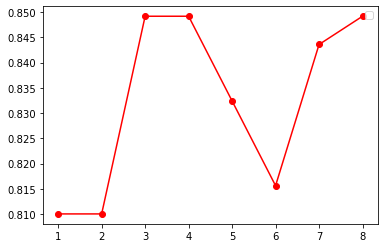

In [28]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

accuracies = list()
max_attributes = len(list(X_train.columns))
depth_range = range(1, max_attributes + 1)

# Testing max_depths from 1 to max attributes
for depth in depth_range:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X = X_train, y = y_train)
    accuracies.append(model.score(X = X_test, y = y_test))

plt.plot(range(1, max_attributes + 1),accuracies,'ro-')
plt.legend()
plt.show()

In [29]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=3)

max_depth has been set to 3 since that is the smallest depth at which the classifer achieves a maximum accuracy of nearly 85 % thereby reducing runtime and avoiding over fitting.

d) Plot the decision tree. Briefly explains how it works. 

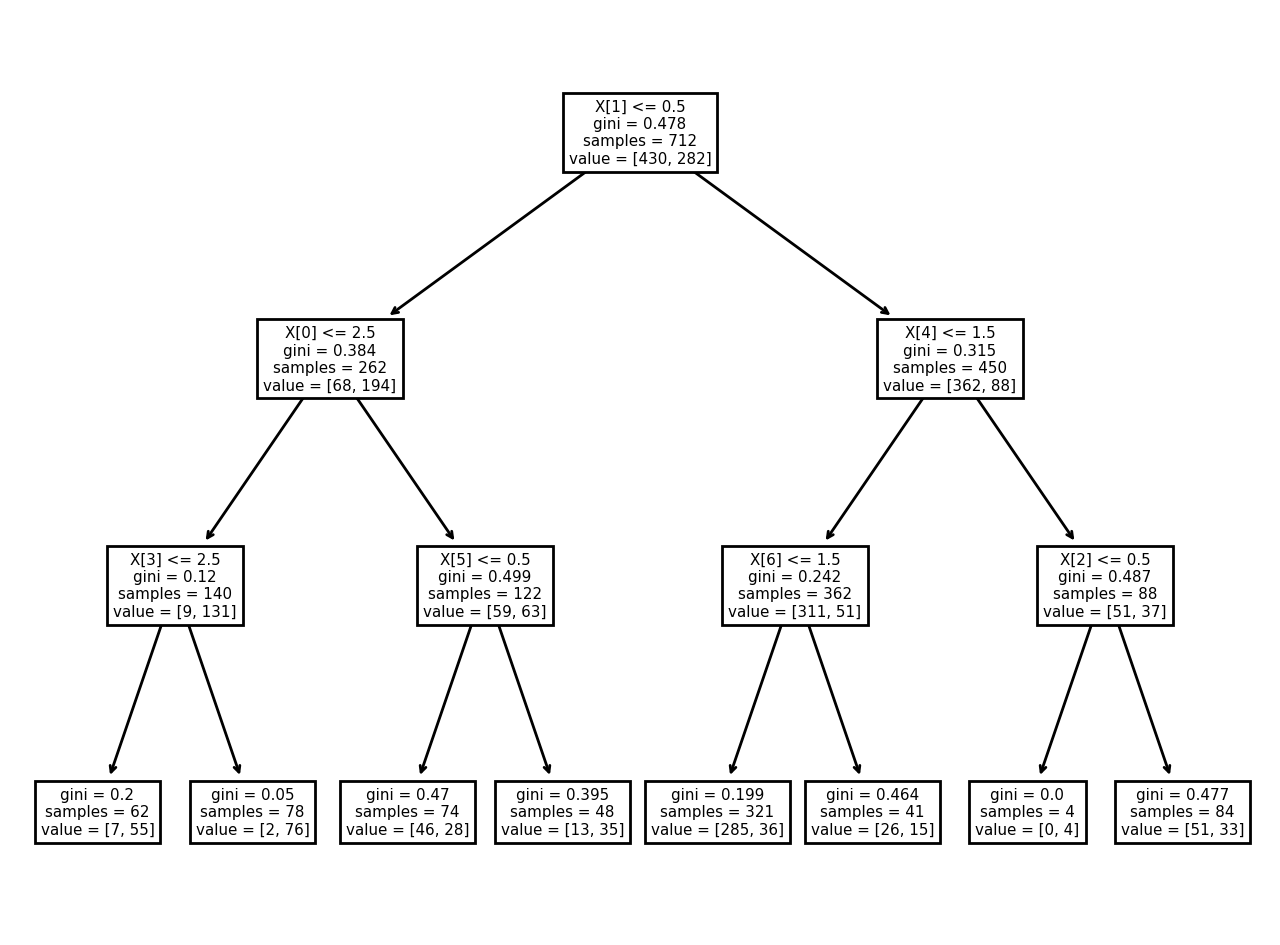

In [30]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=200)
plot_tree(model)
plt.show()

'Sex' is the feature on which the first split occurs with a gini score of 0.478. At the second level, the split  occurs on 'Pclass' if Sex <= 0.5 and on 'Cabin', otherwise. At the third level, the splits occur on 'Fare' or 'Embarked' depending on Pclass <= 2.5 and on 'Age' or 'Title' depending on if Cabin <= 1.5. Finally, the class is decided based on the split at the third level where the position of the largest value in the value field indicates if the sample belongs to class '0' or class '1'.      

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). 

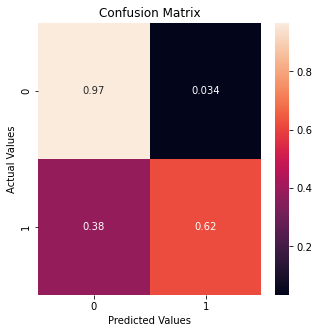

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred, normalize='true')              
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [32]:
import random

# Get index of all missclassified samples
missclassified = []
i = 0
for p, q in zip(y_test, y_pred):
    if p != q:
        missclassified.append(y_test.index.values[i])
    i = i + 1

# Two random missclassified samples
for i in range(2):
    ind = missclassified[random.randint(0,len(missclassified) - 1)]
    print(X_test.loc[[ind]])

     Pclass  Sex  Age  Fare  Cabin  Embarked  Title  isAlone
657       3    0  1.0   2.0      1         2      3        0
    Pclass  Sex  Age  Fare  Cabin  Embarked  Title  isAlone
74       3    1  1.0   3.0      1         0      1        1


The model is better at predicting '0's when compared to predicting '1's. It predicts '0' correctly with a probability of 97 % and '1' with a probability of 62 %. It wrongly predicts '1' as '0' 38 % of the time.

Sample 657 : Since Sex < 0.5, it takes the left branch at the root node. Pclass > 2.5, so it takes the right branch at the next level. Since Emabarked > 0.5, it takes the right branch and gets wrongly predicted as class '1'.

Sample 74 : Since Sex > 0.5, it takes the right branch at the root node. Cabin <= 1.5, so it takes the left branch at the next level. Since Title <= 1.5, it takes the left branch and gets wrongly predicted as class '0'.

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed.

In [33]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=4)
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

grid_search = GridSearchCV(estimator = model, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")

grid_search.fit(X_train, y_train)
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,0.011674,0.000582,0.005455,0.001176,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.818182,0.818182,0.802817,0.795775,0.788732,0.804738,0.011846,1
30,0.008402,0.000773,0.004101,0.001104,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.818182,0.818182,0.802817,0.795775,0.788732,0.804738,0.011846,1
6,0.009921,0.001185,0.004648,0.001293,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.818182,0.811189,0.802817,0.795775,0.788732,0.803339,0.010515,3
31,0.008060,0.001293,0.003858,0.000820,entropy,3,10,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.818182,0.811189,0.802817,0.795775,0.788732,0.803339,0.010515,3
11,0.007892,0.001491,0.003635,0.000534,gini,5,10,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.811189,0.832168,0.809859,0.781690,0.753521,0.797685,0.027298,5


In [34]:
print("Optimal Tree : ", grid_search.best_estimator_)
optimal_tree = grid_search.best_estimator_
optimal_tree.fit(X = X_train, y = y_train)
print("Accuracy = ",optimal_tree.score(X = X_test, y = y_test))


Optimal Tree :  DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=4)
Accuracy =  0.8324022346368715


The GridSearchCV module in sklearn has been used to tune the parameters of the model. Possible values to try out for parameters such as max_depth, min_samples_leaf and criterion are input into the function and it tries out all possible combinations of these paramters and gives out the optimal model with the best accuracy as output. As seen above, the best paramters were found to be [max_depth = 3,min_samples_leaf=5] with an accuracy of 83 %. Though there is a slight decrease in the accuracy from the optimal model above, this is because only a few values were tried out for tuning the parameters. Increasing the possible inputs, might lead to a better accuracy.

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. 

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
reduced_X_train = pca.fit_transform(X_train)
reduced_X_test = pca.fit_transform(X_test)

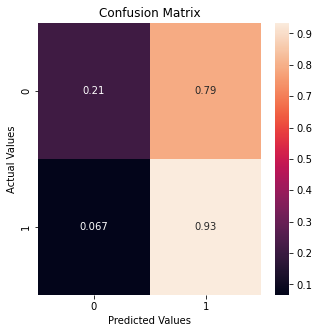

In [36]:
model = DecisionTreeClassifier(max_depth = 3)
model.fit(X = reduced_X_train, y = y_train)
y_pred = model.predict(reduced_X_test)
cm = confusion_matrix(y_test, y_pred, normalize = 'true')
cm_df = pd.DataFrame(cm)
                     
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

As can be seen, the accuracy of predicting '0' has significantly decreased from 97 % to 21 % while the accuracy of predicting '1' has increased from 62 % to 93 %. Amost 79 % of the '0's are predicted as '1's. Thus, it can be inferred that the model finds it more easier to classify '1's corectly when compared to '0's. This model is not very interpretable since the number of features has been reduced to 5 by PCA and there's no way of knowing what each feature means and which ones are most responsible for the missclassifications.

## Random Forests
Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decision(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model 

In [1]:
from sklearn import tree

class Random_Forest():

    def __init__(self, num_trees, max_depth, criterion):
        self.max_depth = max_depth
        self.criterion = criterion
        self.decision_trees = [tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def _sample(self, X, y):
        X_sample = X.sample(frac=0.6,random_state=200)
        y_sample = y[X_sample.index.values]
        return X_sample, y_sample

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(elf, predictions):
        majority = np.zeros(shape=predictions[0].shape)
        for prediction in predictions:
            for i in range(len(prediction)):
                majority[i] += prediction[i] 
        for i in range(len(majority)):
            if majority[i] >= 3:
                majority[i] = 1
            else:
                majority[i] = 0
        return majority 
    
    def _predict_tree(self, X_test,idx):
         return self.decision_trees[idx].predict(X = X_test)
    
    def predict(self, X_test):
        predictions = []
        for idx in range(len(self.decision_trees)):
            predictions.append(self._predict_tree(X_test, idx))
        return self._majority(predictions = predictions)


### Hyperparameter tuning, and model evaluation for random forests. 

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm.

In [2]:
import pandas as pd
data = pd.read_csv("train.csv")

# Handling Age - Fill with mean of the column
data['Age'].fillna(value = data['Age'].mean(), inplace = True)

# Handling Cabin - Fill with 'Unknown'
data['Cabin'].fillna(value = "Unknown", inplace = True)

# Handling Embarked - Fill with most frequent value
data['Embarked'].fillna(value = data['Embarked'].mode().iloc[0], inplace = True)

# Mapping categorical features to numeric values
data['Embarked'] = data['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
data['Sex'] = data['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Mapping continuous numeric variables to discrete values
data.loc[data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3

data.loc[ data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4 

data['Cabin'] = data['Cabin'].str[0]
cabin_mapping = {"U": 1, "C": 2, "B": 3, "D": 4, "E": 5, "A" : 6, "F" : 7, "G" : 8, "T" : 9} 
data['Cabin'] = data['Cabin'].map(cabin_mapping)

data['Title'] = data['Name'].str.split(",").str.get(1).str.split(".").str.get(0).str[1:]
# Replace least common titles
data['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare', inplace = True)
data['Title'].replace('Mlle', 'Miss', inplace = True)
data['Title'].replace('Ms', 'Miss', inplace = True)
data['Title'].replace('Mme', 'Mrs', inplace = True)
title_mapping = {"Mr": 1, "Master": 2, "Mrs": 3, "Miss": 4, "Rare": 5}
data['Title'] = data['Title'].map(title_mapping)

data['isAlone'] = 0
data.loc[data['SibSp'] + data['Parch']  == 0, 'isAlone'] = 1

PassengerIds = data['PassengerId']
drop_columns = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']
data.drop(drop_columns, axis = 1, inplace = True)

from sklearn.model_selection import train_test_split
target = data['Survived']
data.drop('Survived', axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=4)


In [4]:
import numpy as np

randomForest = Random_Forest(num_trees = 5, max_depth = 3, criterion = 'gini')
randomForest.fit(X = X_train, y = y_train)
y_pred = randomForest.predict(X_test= X_test) 

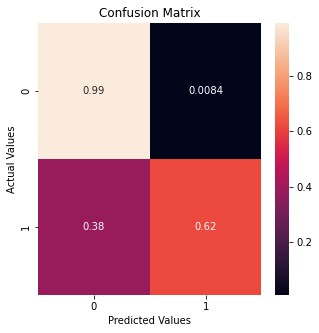

Accuracy =  0.8659217877094972


In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, normalize = 'true')
cm_df = pd.DataFrame(cm)
                     
#Plotting the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, y_pred))

On setting the paramters of the random forest to [num_trees = 5, max_depth = 3, criterion = 'gini'] it can be seen that the accuracy has increased from 85 % to nearly 87 %. The accuracy of predicting '0's has increased from 97 % to 99 % while the accuracy of predicting '1's remains 62 % as the optimal tree above. 

In [14]:
import itertools

params = [[10,50,100,500,1000], [5,10,15], ['gini', 'entropy']]
possible_params = list(itertools.product(*params))

results = []
for params in possible_params:
    randomForest = Random_Forest(num_trees = params[0], max_depth = params[1], criterion = params[2])
    randomForest.fit(X = X_train, y = y_train)
    y_pred = randomForest.predict(X_test= X_test) 
    results.append([params[0],params[1],params[2], metrics.accuracy_score(y_test, y_pred)])


In [15]:
print(max(results, key=lambda x: x[3]))

[10, 5, 'entropy', 0.8379888268156425]


On experimenting with different tree depths, number of trees and criteria, the best model has been found to be [tree_depth = 10,number_of_trees = 5, criterion = 'entropy'] with an accuracy of nearly 84 %. This is slightly lesser than the accuracy reported above because the optimal depth has been found to be 3 which was not used in the experimentation. 

Even though the random forest algorithm is less interpretable than decision trees, it has advantage of being more accurate since it relies on the predictions made by multiple decision trees.

### Calculations 

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Classes}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 


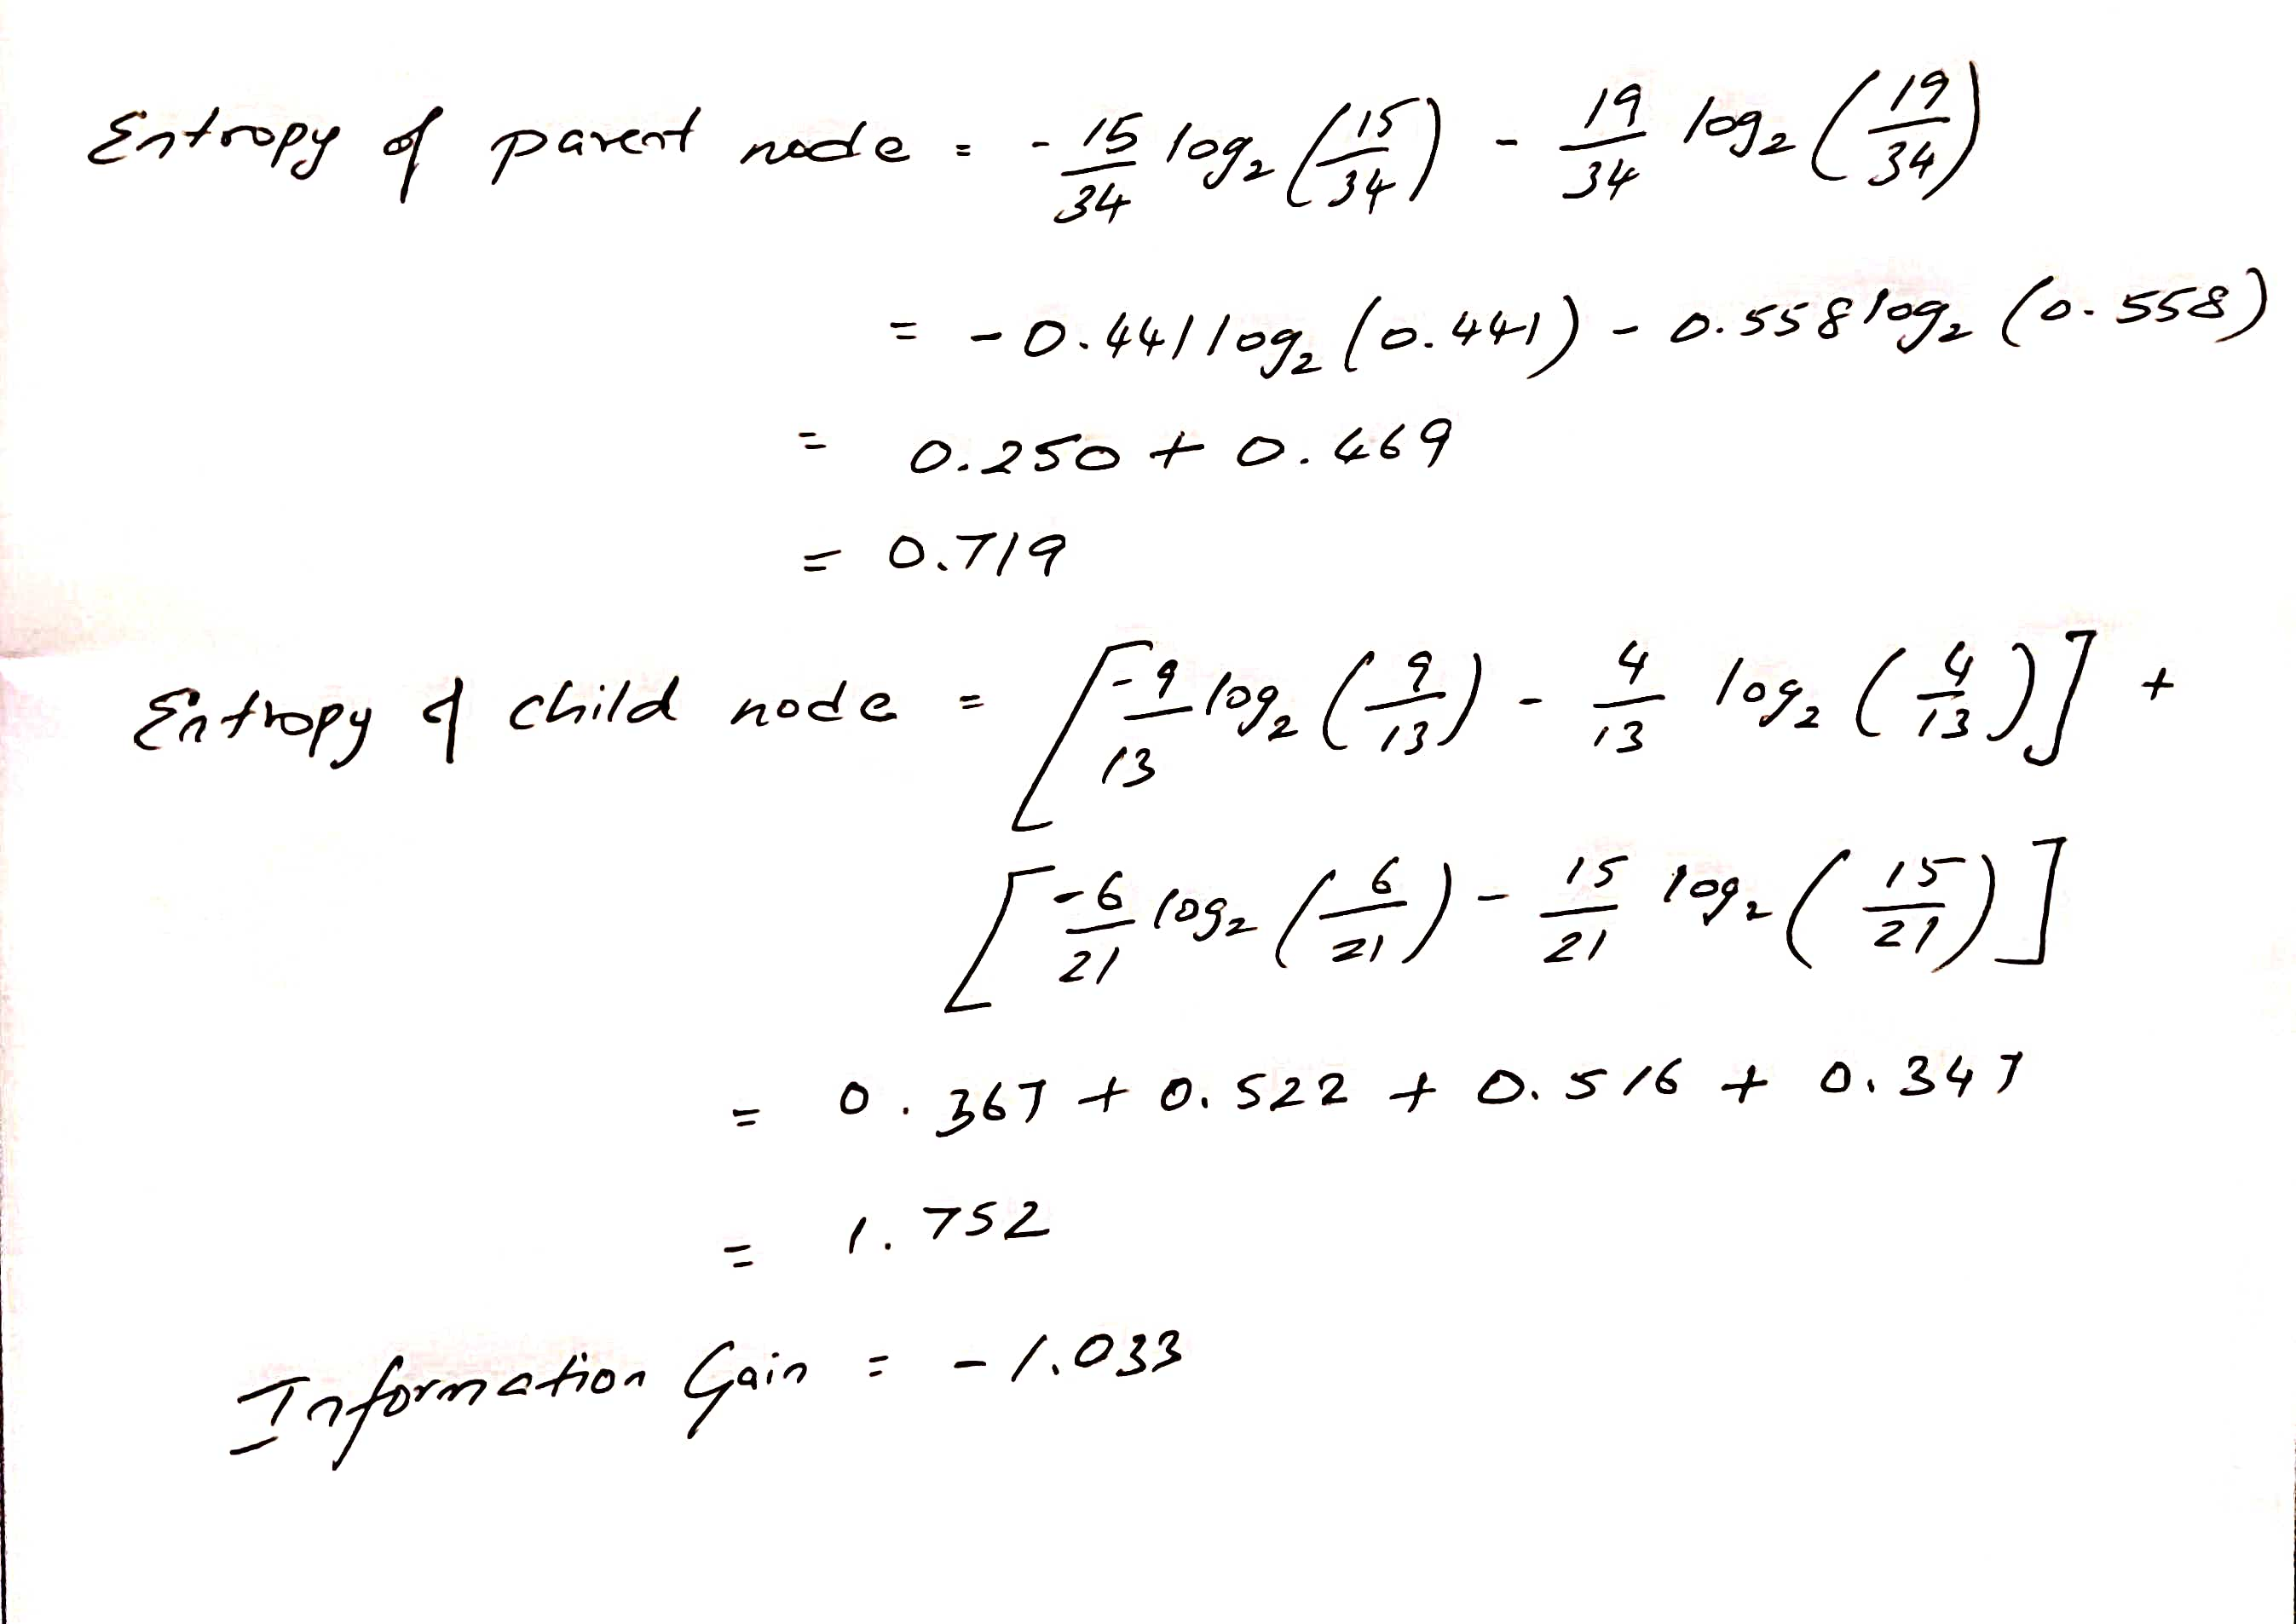